# AI TRAFFIC SIGNS RECOGNITION

#### Importing the libraries

In [82]:
import numpy as np
import zipfile
import os
import shutil, sys  
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns

from matplotlib import style
style.use('fivethirtyeight')

#### Link to the data set
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [83]:
# dataset folder path - locally ---!! download dataset!!!
current_path = os.getcwd()
print(current_path)

C:\Users\seule\traffic_signs


In [84]:
# return the number of classes from the dataset
data_dir = 'trafficData'
NUM_CATEGORIES = len(os.listdir(data_dir))
NUM_CATEGORIES

43

In [85]:
# Overview of classes
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

#### Finding Total Classes and Visualization for it

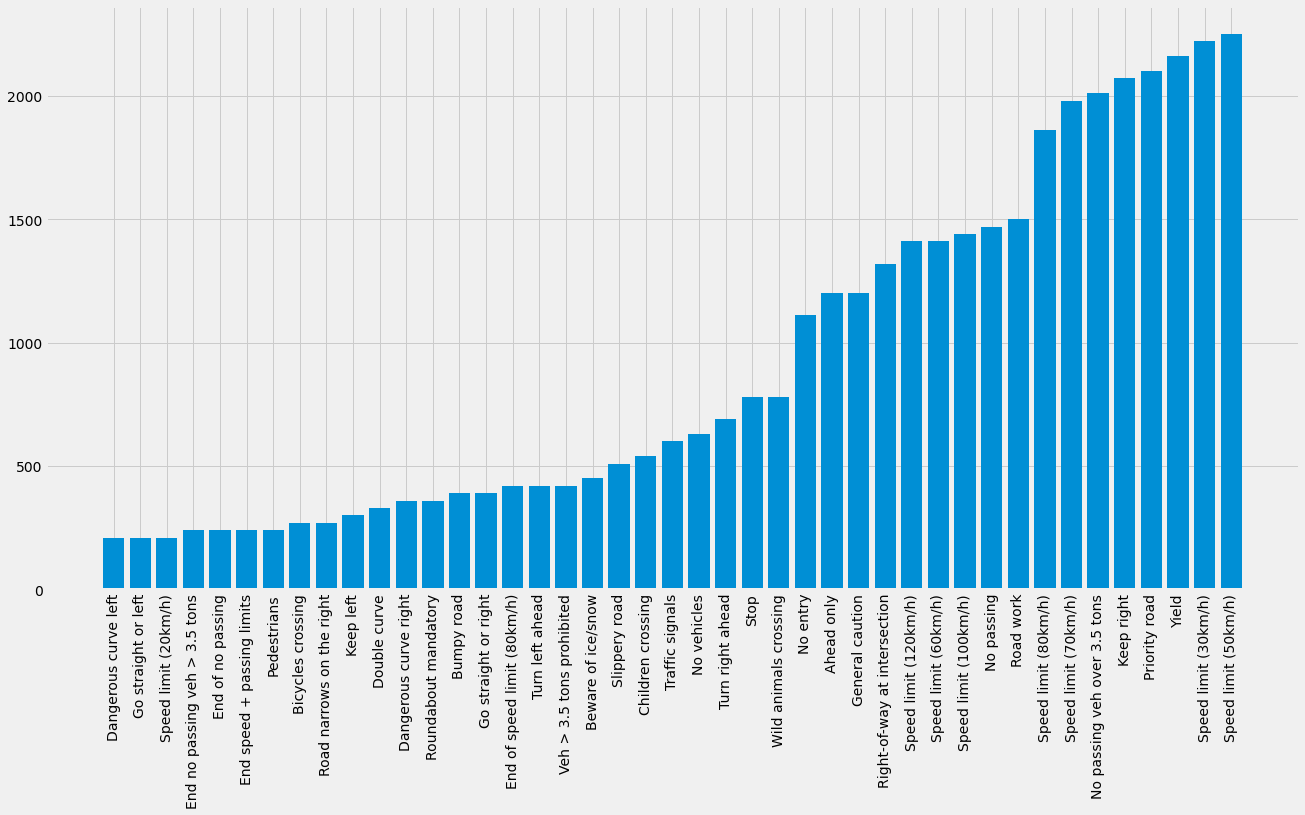

In [86]:
folders = os.listdir(data_dir)

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(data_dir + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(20,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

#### Încărcarea setului de date și redimensionarea imaginilor/prelucrarea acestora

In [87]:
data = []
labels = []
# Retrieving the images and their labels
for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)

    for traffic_sign in images:
        try:
            image = cv2.imread(path + '\\' + traffic_sign)
            image = cv2.resize(image, (30, 30), 3)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
images = np.array(data)
labels = np.array(labels)

In [88]:
print(images.shape) # Total number of images in all classes

(39209, 30, 30, 3)


#### Splitting data 

After reshaping the arrays, it’s time to split them into training + validation (80%) and testing data (20%)

In [89]:
TEST_SIZE = 0.2
Train_SIZE = 0.6
Validate_SIZE = 0.2
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels),
        train_size=Train_SIZE + Validate_SIZE, #0.8
        test_size=TEST_SIZE, #0.2
        random_state=42
    )

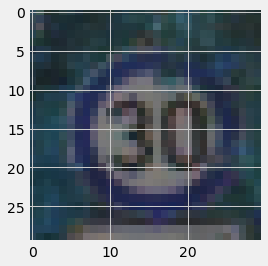

In [90]:
# generating a random image from the dataset

i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])

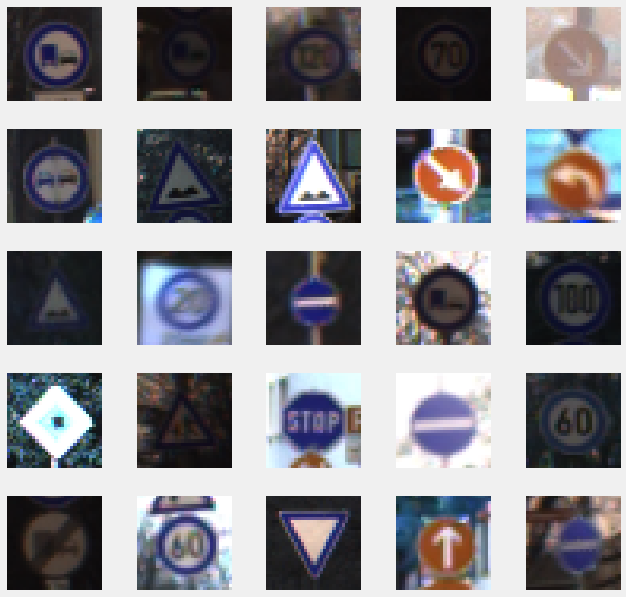

In [ ]:
# we define the size of the plot grid and bring random images from the data set
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)

  axes[i].imshow(x_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [91]:
# shuffling the data to make sure our network does not learn the order of the images

from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train,y_train)

Dorim sa standardizăm în continuare setul de date.

In [92]:
# converting images to grayscale and achieving normalization

x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

print(x_train_gray.shape)
print(x_test_gray.shape)

(31367, 30, 30, 1)
(7842, 30, 30, 1)


In [94]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

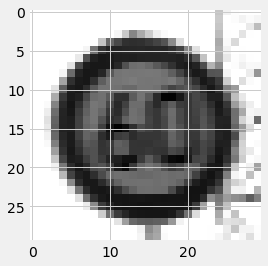

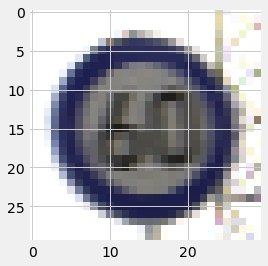

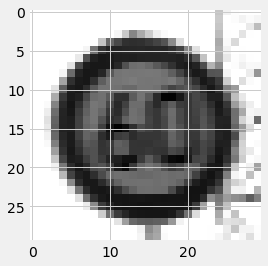

In [110]:
i = np.random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')
y_train[i]

In [ ]:
X_trainn = x_train/255 
x_testt = x_test/255

print("X_train.shape", X_trainn.shape)
print("X_test.shape", x_testt.shape)

X_train.shape (31367, 30, 30, 3)
X_test.shape (7842, 30, 30, 3)


#### Building the model

Here the CNN model's structure is defined. Regarding the loss function the categorical crossentropy is used, and the ADAM is selection for the network optimization.

As we have 80% training of images in the dataset, we are setting EPOCHS as 25. The model contains two Conv2D layers followed by one MaxPooling2D layer. This is done two times for the effective extraction of features, which is followed by the Dense layers. A dropout layer of 0.5 is added to avoid overfitting the data.

In [ ]:
from tensorflow.keras import datasets, layers, models

num_classes = 43
  
def LeNetModel_Modified(X_train):
    model = Sequential()
    model.add(Conv2D(60, (5, 5), 
                     activation ='relu',
                     input_shape=X_train.shape[1:]))
      
    model.add(Conv2D(60, (5, 5), activation ='relu'))
    model.add(MaxPool2D(pool_size =(2, 2)))
      
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(Conv2D(30, (3, 3), activation ='relu'))
    model.add(MaxPool2D(pool_size =(2, 2)))
      
    model.add(Flatten())
    model.add(Dense(500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation ='softmax'))
      
    # Compile model
    model.compile(optimizer='adam', 
                  loss = keras.losses.categorical_crossentropy,
                  metrics =['accuracy'])
    return model

In [ ]:
from tensorflow.keras import datasets, layers, models

num_classes = 43
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # Building the model
     
def LeNetModel(X_train):
    model1 = Sequential()
    model1.add(Conv2D(32, (5, 5), 
                     activation ='relu',
                     input_shape=X_train.shape[1:]))
    
    model1.add(Conv2D(32, (5, 5), activation ='relu'))
    model1.add(MaxPool2D(pool_size =(2, 2)))
    
    model1.add(Conv2D(64, (3, 3), activation ='relu'))
    model1.add(Conv2D(64, (3, 3), activation ='relu'))
    model1.add(MaxPool2D(pool_size =(2, 2)))
    
    model1.add(Dropout(rate=0.25))
      
    model1.add(Flatten())
    model1.add(Dense(256, activation ='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(num_classes, activation ='softmax'))
      
    # Compilation of the model
    model1.compile(optimizer='adam', 
                  loss = keras.losses.categorical_crossentropy,
                  metrics =['accuracy'])
    return model1

#### Compiled Neural Network and Model Summary LeNetModel_Modified

In [ ]:
model = LeNetModel_Modified(x_train)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 60)        4560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 30)          16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 270)               0

#### Compiled Neural Network and Model Summary LeNetModel

In [ ]:
model1 = LeNetModel(x_train)
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)         

#### Fit the data and training the model

In [ ]:
# Save model for LeNet_Modified
history =model.fit(x_train, y_train,
                   batch_size=50,
                   epochs=25,
                   validation_split=0.2,
                   verbose=1)
# Save model to file
model.save("Trained.h5")

Epoch 1/25
502/502 [==============================] - 11s 17ms/step - loss: 1.5327 - accuracy: 0.6207 - val_loss: 0.2921 - val_accuracy: 0.9294
Epoch 2/25
502/502 [==============================] - 9s 17ms/step - loss: 0.3823 - accuracy: 0.9048 - val_loss: 0.1482 - val_accuracy: 0.9638
Epoch 3/25
502/502 [==============================] - 9s 18ms/step - loss: 0.2549 - accuracy: 0.9350 - val_loss: 0.1145 - val_accuracy: 0.9731
Epoch 4/25
502/502 [==============================] - 9s 17ms/step - loss: 0.2008 - accuracy: 0.9499 - val_loss: 0.1377 - val_accuracy: 0.9651
Epoch 5/25
502/502 [==============================] - 9s 18ms/step - loss: 0.1644 - accuracy: 0.9591 - val_loss: 0.1064 - val_accuracy: 0.9740
Epoch 6/25
502/502 [==============================] - 9s 17ms/step - loss: 0.1500 - accuracy: 0.9609 - val_loss: 0.1120 - val_accuracy: 0.9721
Epoch 7/25
502/502 [==============================] - 9s 17ms/step - loss: 0.1343 - accuracy: 0.9643 - val_loss: 0.0992 - val_accuracy: 0.978

In [ ]:
#### Evaluating the model LeNet_Modified

saved_model = load_model('Trained.h5')
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.2f\nTest: %.2f' % (train_acc * 100, test_acc * 100))

Train: 99.60
Test: 98.74


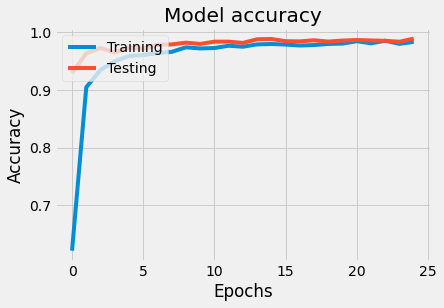

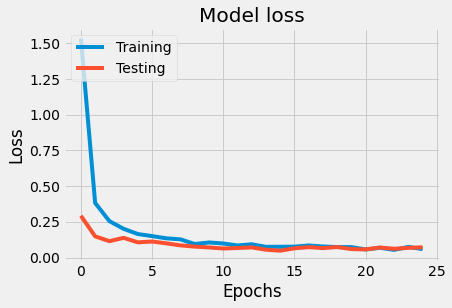

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

#### Evaluatin the model LeNet

In [ ]:
# Save the model LeNet
history =model1.fit(x_train, y_train,
                   batch_size=50,
                   epochs=15,
                   validation_split=0.2,
                   verbose=1)
# Save model to file
model1.save("Trained1.h5")

Epoch 1/15
502/502 [==============================] - 8s 14ms/step - loss: 1.7429 - accuracy: 0.5800 - val_loss: 0.3587 - val_accuracy: 0.9115
Epoch 2/15
502/502 [==============================] - 7s 14ms/step - loss: 0.4695 - accuracy: 0.8755 - val_loss: 0.1580 - val_accuracy: 0.9582
Epoch 3/15
502/502 [==============================] - 7s 15ms/step - loss: 0.2882 - accuracy: 0.9252 - val_loss: 0.0986 - val_accuracy: 0.9778
Epoch 4/15
502/502 [==============================] - 7s 14ms/step - loss: 0.2315 - accuracy: 0.9385 - val_loss: 0.0645 - val_accuracy: 0.9845
Epoch 5/15
502/502 [==============================] - 7s 14ms/step - loss: 0.1824 - accuracy: 0.9505 - val_loss: 0.0789 - val_accuracy: 0.9783
Epoch 6/15
502/502 [==============================] - 7s 13ms/step - loss: 0.1617 - accuracy: 0.9566 - val_loss: 0.0700 - val_accuracy: 0.9837
Epoch 7/15
502/502 [==============================] - 7s 13ms/step - loss: 0.1622 - accuracy: 0.9561 - val_loss: 0.0566 - val_accuracy: 0.9872

In [ ]:
saved_model = load_model('Trained1.h5')
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.2f\nTest: %.2f' % (train_acc * 100, test_acc * 100))

Train: 98.86
Test: 98.30


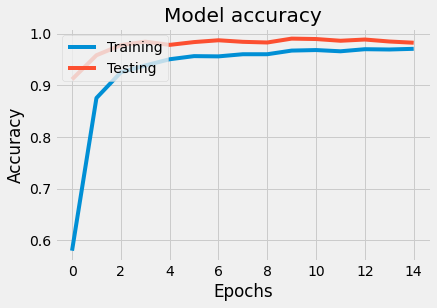

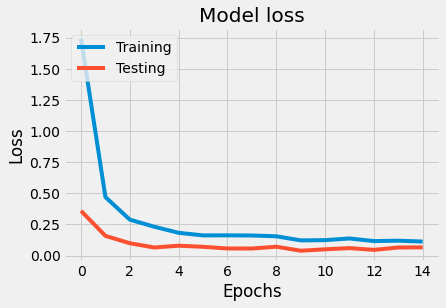

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()


In [ ]:
labels = {'Speed limit (20km/h)',
               'Speed limit (30km/h)',
               'Speed limit (50km/h)',
               'Speed limit (60km/h)',
               'Speed limit (70km/h)',
               'Speed limit (80km/h)',
               'End of speed limit (80km/h)',
               'Speed limit (100km/h)',
               'Speed limit (120km/h)',
               'No passing',
               'No passing veh over 3.5 tons',
               'Right-of-way at intersection',
               'Priority road',
               'Yield',
               'Stop',
               'No vehicles',
               'Veh > 3.5 tons prohibited',
               'No entry',
               'General caution',
               'Dangerous curve left',
               'Dangerous curve right',
               'Double curve',
               'Bumpy road',
               'Slippery road',
               'Road narrows on the right',
               'Road work',
               'Traffic signals',
               'Pedestrians',
               'Children crossing',
               'Bicycles crossing',
               'Beware of ice/snow',
               'Wild animals crossing',
               'End speed + passing limits',
               'Turn right ahead',
               'Turn left ahead',
               'Ahead only',
               'Go straight or right',
               'Go straight or left',
               'Keep right',
               'Keep left',
               'Roundabout mandatory',
               'End of no passing',
               'End no passing veh > 3.5 tons'}
x_test = np.array(x_test)
pred = np.argmax(model.predict(x_test), axis=-1)
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=labels))

# Accuracy on each class

[INFO] evaluating network...
                               precision    recall  f1-score   support

        Speed limit (100km/h)       1.00      0.95      0.97        38
    Road narrows on the right       0.97      0.99      0.98       496
              Turn left ahead       0.98      0.99      0.98       450
                 Double curve       0.98      0.99      0.99       280
                    Keep left       1.00      1.00      1.00       418
                  Pedestrians       0.99      0.96      0.97       364
           Beware of ice/snow       1.00      1.00      1.00        59
         Go straight or right       0.99      0.99      0.99       278
                     No entry       1.00      0.97      0.98       301
            Bicycles crossing       0.99      0.98      0.98       268
                Priority road       1.00      0.99      1.00       370
  End of speed limit (80km/h)       1.00      0.98      0.99       236
    Veh > 3.5 tons prohibited       0.98      1

<AxesSubplot:>

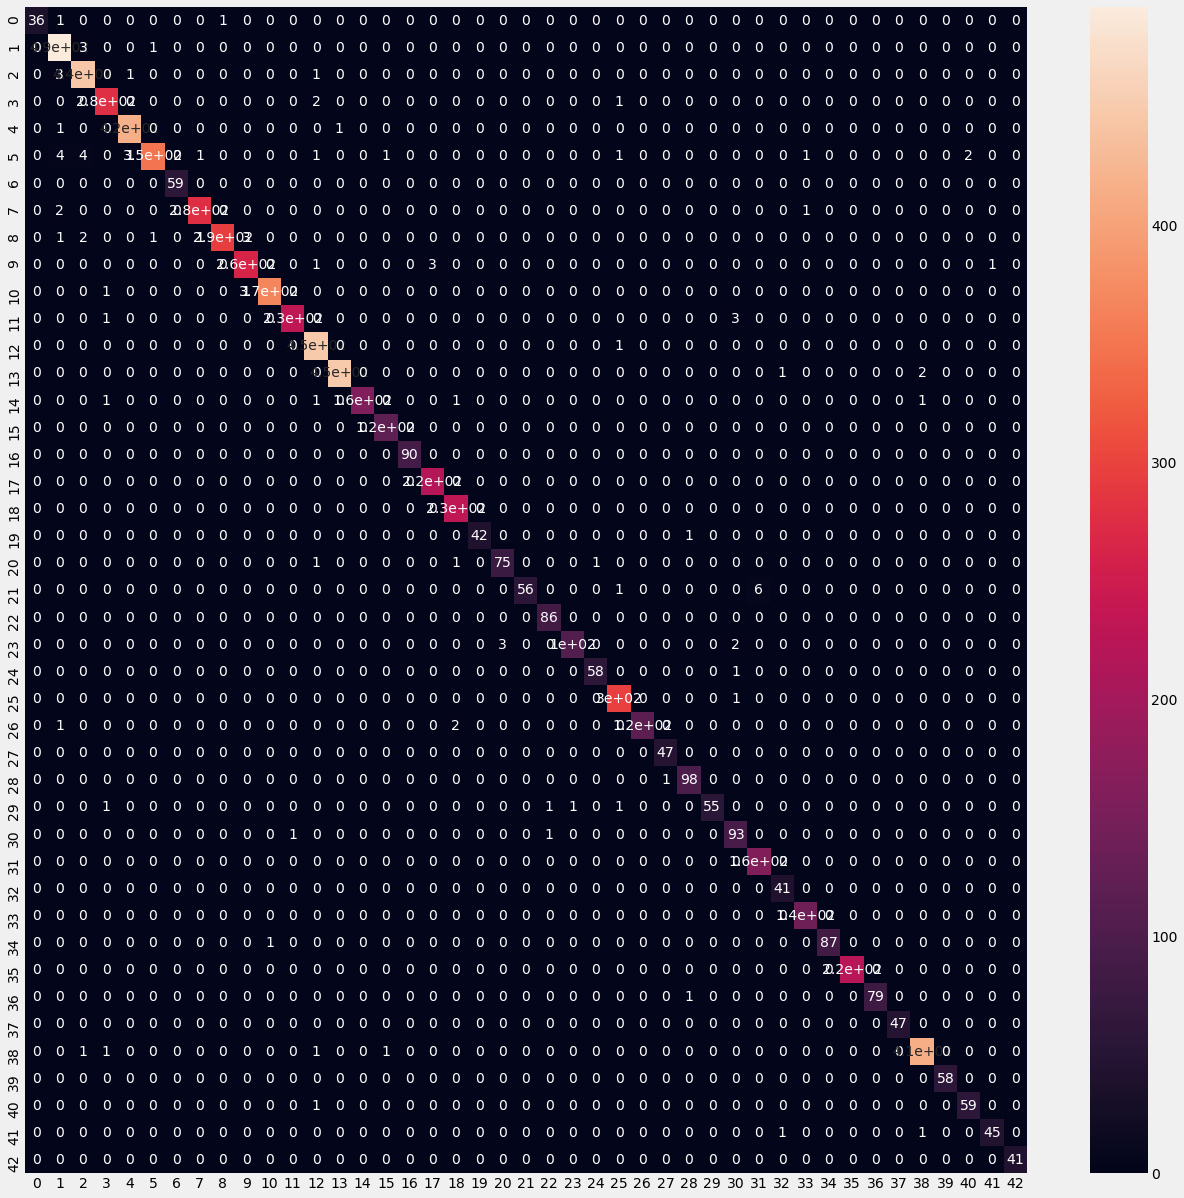

In [ ]:
# The matrix of confusion

cm =confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True)

#### Predictions some images using GUI

In [111]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

# Load your model
model = load_model('Trained.h5') # Path to your model

# Initialise GUI
top=tk.Tk()
# Window dimensions (800x600)
top.geometry('800x600')
# Window title
top.title('Traffic sign classification')
# Window background color
top.configure(background='#AF0102')
# Window label
label=Label(top,background='#ffffff', font=('arial',15,'bold'))
# Sign image
sign_image = Label(top)


# Function to classify image
def classify(file_path):
    global label_packed
    # Open the image file path
    image = Image.open(file_path)
    # Resize the image
    image = image.resize((30,30))
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = np.expand_dims(image, axis=0)
    # Convert to numpy array
    image = np.array(image)
    # Make prediction
    pred = np.argmax(model.predict([image])[0], axis=-1)
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)
    
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# Window colors
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Speed limit (80km/h)
Speed limit (60km/h)
